# Изучение клиентов фитнес-центра

Автор: **Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

Для сети пользователей фитнес-центров необходимо:
- спрогнозировать вероятность оттока клиента;
- сформировать типичные портреты пользователей;
- выявить основные признаки, наиболее сильно влияющие на отток.

### Описание данных

- 'Churn' — факт оттока в текущем месяце;
- 'gender' — пол
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
- 'Partner' — сотрудник компании-партнёра клуба
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга»
- 'Phone' — наличие контактного телефона
- 'Age' — возраст
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
- 'Group_visits' — факт посещения групповых занятий
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары и тд

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/gym_churn/gym_churn.csv')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [ ]:
df.duplicated().sum()

0

Пропусков и полных дубликатов нет.
Приведем названия столбцов для удобства к строчному типу букв.

In [ ]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

## EDA

### 1.1   Описательные статистики<a id='describe'></a>

Посмотрим, сколько людей из общей массы клиентов "ушло в отток".

In [ ]:
df['churn'].value_counts(normalize = True)

0    0.73475
1    0.26525
Name: churn, dtype: float64

27% клиентов ушло в отток в текущем месяце, 73% осталось.

Выведем описательные статистики для признаков.

In [ ]:
df.describe().round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,5.01,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,3.90,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,2.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,2.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,2.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,7.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,13.00,31.00,6.02,6.15,1.00


Можно заметить, что возрастной разброс клиентов не столь большой: среднее - 29 лет , стандартное отклонение - 3 года. А вот время с момента первого посещения довольно сильно варьируется: при среднем 3,72 мес. стандартное отклонение такое же (3,75 мес).

### 1.2   Выявление мультиколлинеарности

Построим матрицу корреляций признаков и отобразим ее в виде тепловой карты.<br>

Сразу сделаем оговорку, что коэффициент корреляции Пирсона используется для поиска линейной взаимосвязи величин, и если зависимость нелинейная, данный коэффициент ее не уловит. То есть формально, не по всем признакам (в том числе интересующий нас параметр `churn`) правильно строить матрицу корреляций. Однако, для целей бизнеса и такой инструмент может быть полезен, так как хотя бы грубо может показать такие взаимосвязи.

<Axes: >

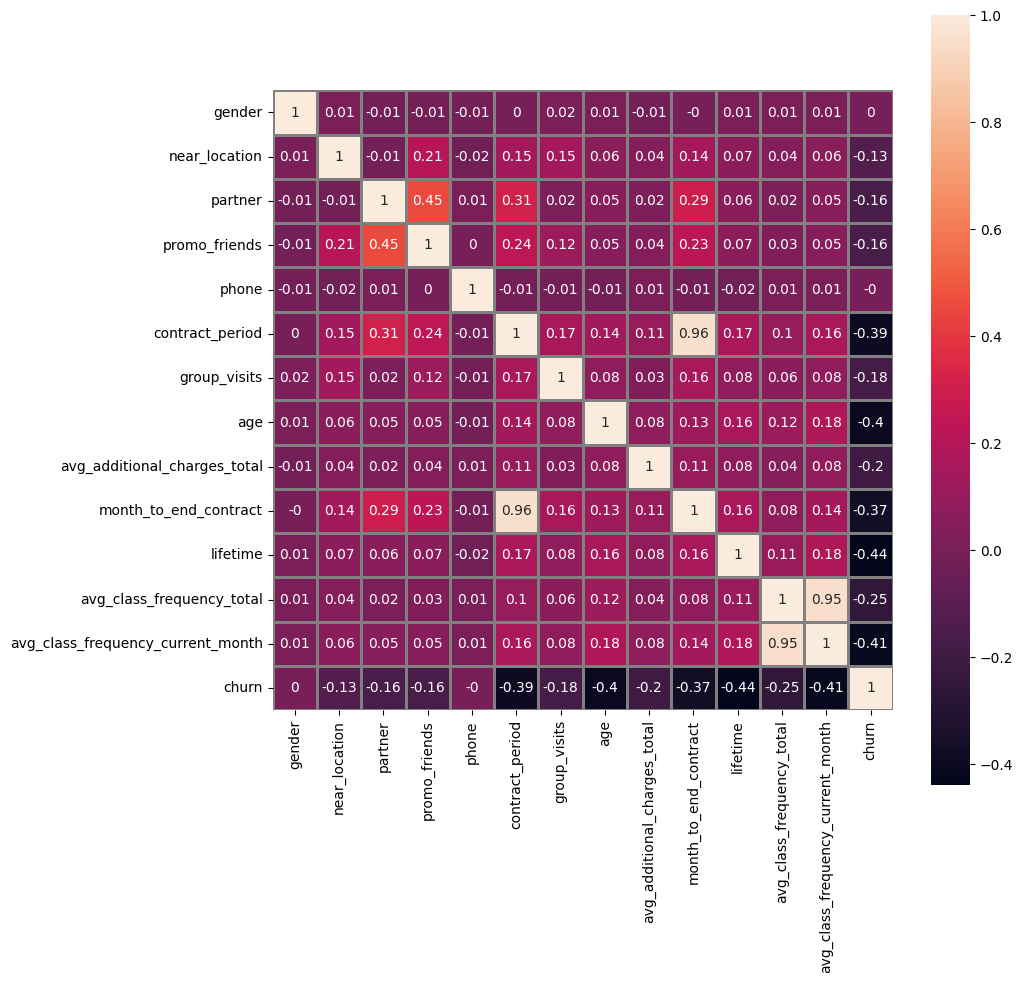

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr().round(2), annot=True, square=True, linewidths=1, linecolor='gray')

Очевидно наличие мультиколлинеарности в матрице наших признаков, т.к. мы имеем 2 пары очень высоко-корреллирующих между собой признаков: это параметры `общий срок контракта`  и `срок до конца контракта` , имеющие коэффициент корреляции 0,97, а также параметры `общая частота посещений` и `частота посещений в последний месяц`.  На интуитивном уровне также понятна их высокая взаимосвязь.

Некоторые прогнозные модели (в частности, модель логистической регресии, которую мы далее планируем использовать в исследовании) очень чувствительны к мультиколлинеарности. Потому нам следует избавиться от дублирующих признаков.

Среди первый двух признаков более показательным будем считать общий срок абонемента, поскольку второй признак (срок до конца абонемента) в большей степени зависит от временной точки, когда собирались данные. Общий же срок абонемента показывает, на сколько серъёзно клиент настроен в момент его покупки. Так что оставим `общий срок абонемента` и удалим `срок до конца абонемента`.

Аналогично со второй парой признаков: на наш взляд, показательней является частота посещений на длительном промежутке, нежели чем в послений месяц, поскольку в последний месяц может попасть отпуск клиента, и это спровоцирует на ошибочное установдение признака оттока. Оставляем `общая частота посещений` (удаляем `частота посещений в последний месяц`).

In [ ]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)


   Также найдена средняя степень взаимосвязи между признаками `пришел по акции` и `сотрудник компании - партнера` (0,45), что не является признаком мультиколлинеарности. Остальные признаки практически не имеют взаимосвязи между собой.<br>

   Сразу же можно увидеть **умеренную обратную взаимосвязь между показателем оттока и** такими признаками, как **срок контракта, возраст и время с момента первого обращения**: можно предположить, что **чем выше эти показатели, тем ниже отток**.

### 1.3   Оценка средних значений признаков по группам ушедших и оставшихся

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [ ]:
df.groupby('churn').agg('mean').round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total
churn,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,4.71,2.02
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,0.99,1.47


У группы ушедших в отток средние значения всех небинарных признаков заметно меньше, чем у оставшихся. Срок контракта общий и срок до конца контракта у оставшихся превышает срок у ушедших в 3 с лишним раза, средний возраст - на 3 года старше, выручка от "других" услуг - выше почти на 40%, частота посещения всего - на 30% выше, частота посещений в последний месяц выше в 2 раза, а "время жизни" выше почти в 5 раз. Кроме того, оставшися в клубе клиенты на 70% чаще посещали групповые занятия, в 2 раза больше из них пришло по промоакции "Приведи друга", и в полтора раза чаще среди них встречаются сотрудники компаний-партнеров. Соотношение полов и наличие телефона в базе различия в группах не имеют.

### 1.4   Распределения признаков по ушедшим и оставшимся

Поделим признаки на бинарные и остальные (небинарные).

In [ ]:
binary_list = [col for col in df.drop(['churn'], axis = 1) if df[col].min() == 0 and df[col].max() == 1]
not_binary_list = [col for col in df.drop(['churn'], axis = 1) if df[col].min() != 0 or df[col].max() != 1]

print(binary_list)
print(not_binary_list)

['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']


Построим столбчатые диаграммы для каждого бинарного признака в разбивке по признаку оттока.

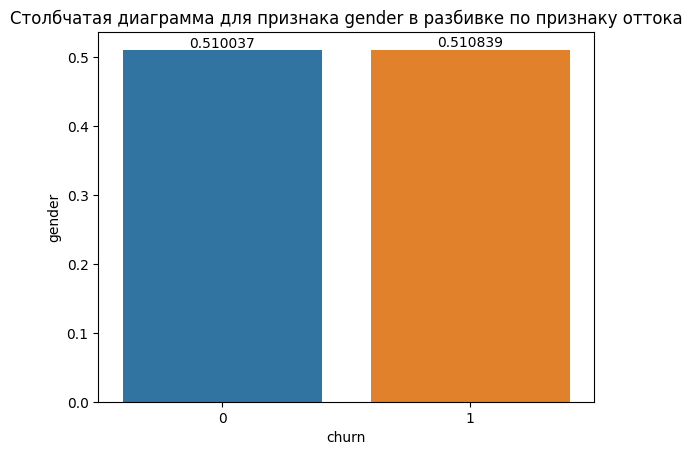

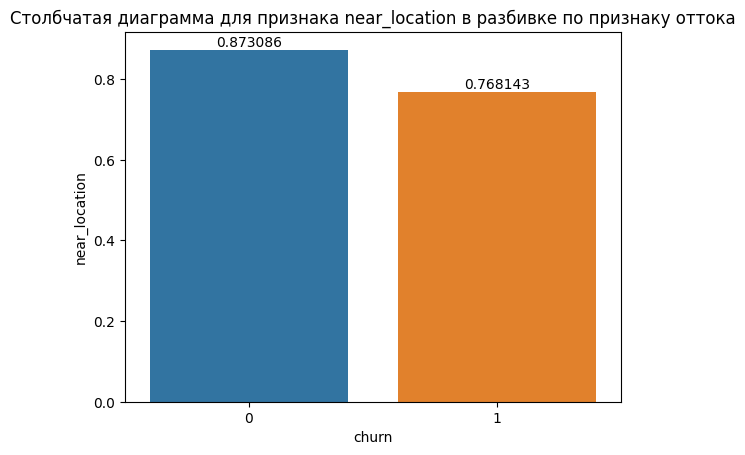

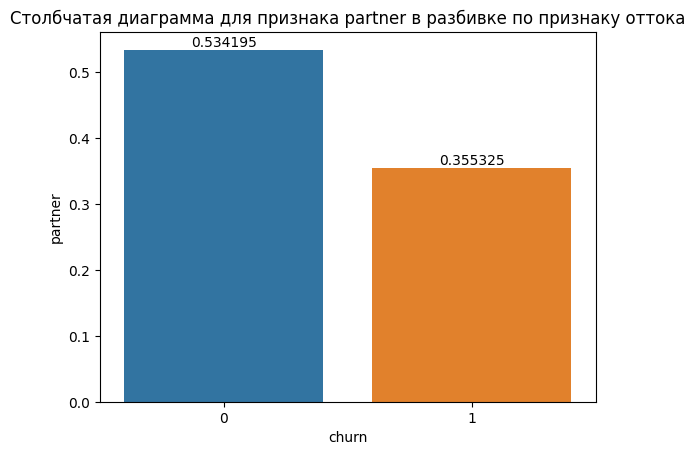

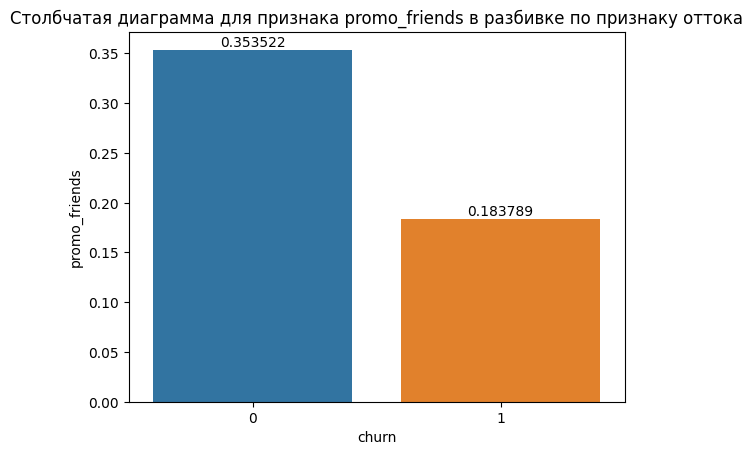

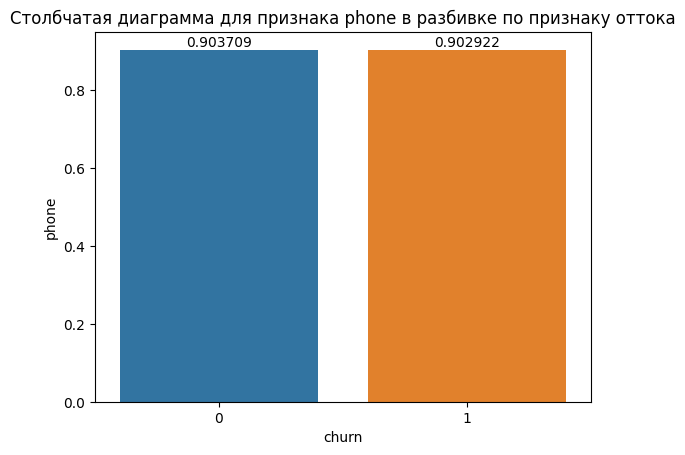

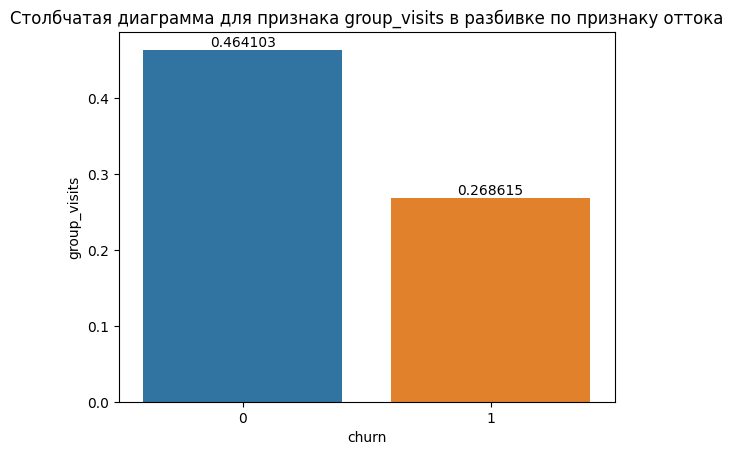

In [ ]:
for col in binary_list:
    ax = sns.barplot(df,  x='churn', y=col, errorbar=None)
    plt.title(f'Столбчатая диаграмма для признака {col} в разбивке по признаку оттока')
    ax.bar_label(ax.containers[0])
    plt.show()

Распределения бинарных признаков в виде столбчатых диаграмм хорошо иллюстрируют все то, что мы уже смогли увидеть и описать выше по таблице средних значений признаков. Разве что можно добавить, что признак близости локации у ушедщих в отток чуть ниже, чем у оставшихся, однако различие нельзя назвать существенным.

Теперь построим диаграммы "ящик с усами" для каждого небинарного признака в разбивке по признаку оттока.

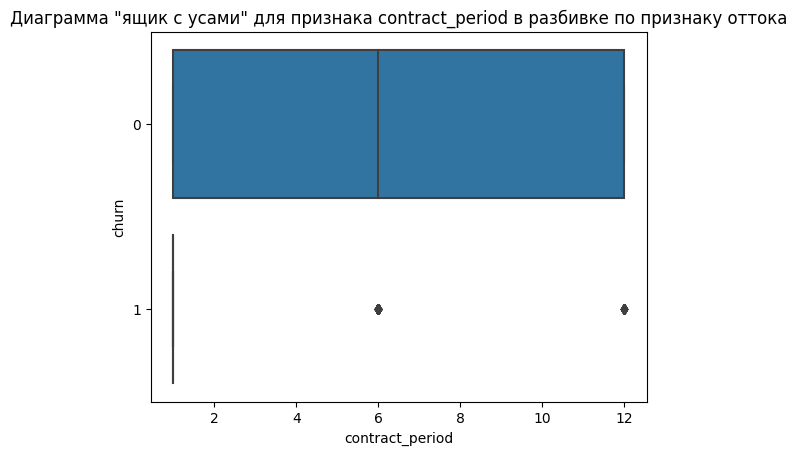

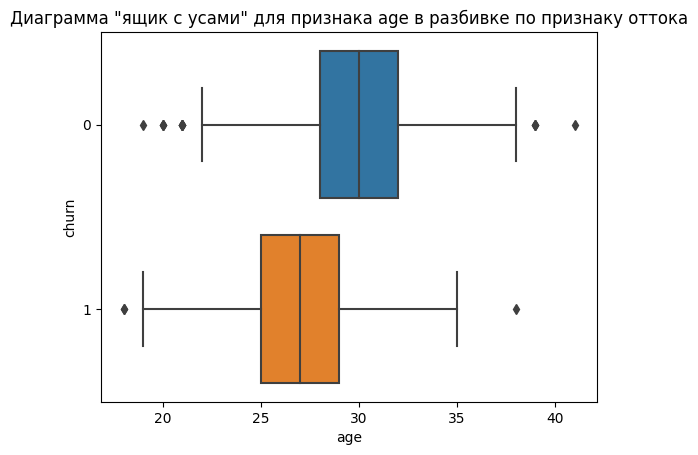

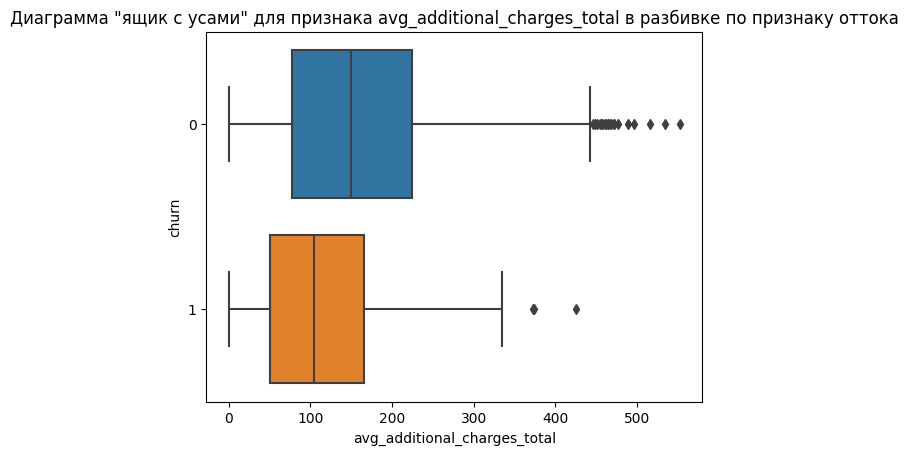

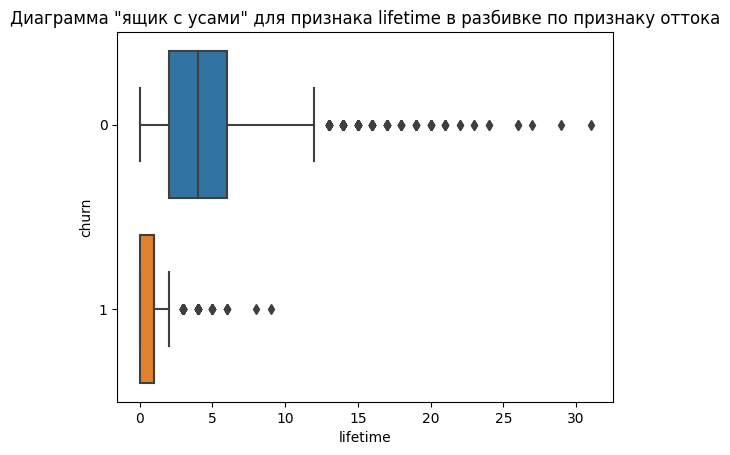

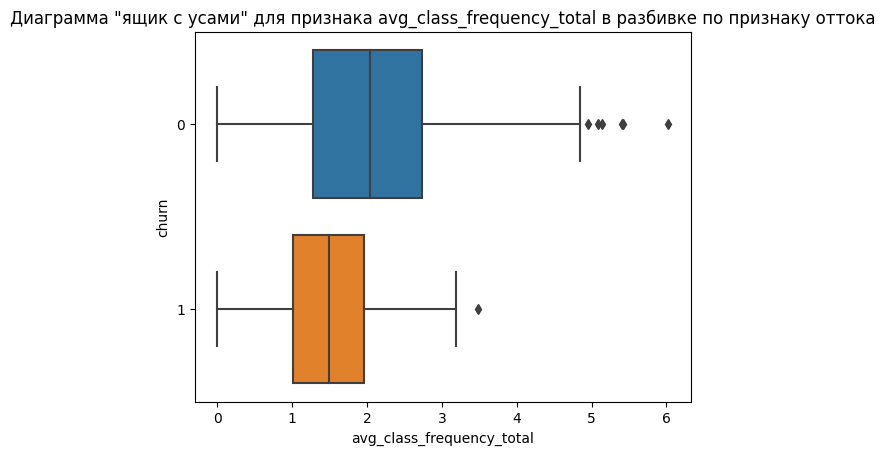

In [ ]:
for col in not_binary_list:
    plt.title(f'Диаграмма "ящик с усами" для признака {col} в разбивке по признаку оттока')
    ax = sns.boxplot(df, orient = 'h', x = col, y = 'churn')
    plt.show()

А вот для небинарных признаков диаграмма "ящик с усами" дает уже больше информации, чем таблица средних значений.
Почти все клиенты , ушедшие в отток имеют месячные контракты (единичные выбросы в 6 и 12 месяцев мы не считаем), в то время как у оставшихся все контракты распределены равномерно: и 1, и 6, и 12 месяцев.<br>

Медиана возраста ушедших - 27 лет, у оставшихся - 30 с лишним. В целом группа оставшихся старше группы ушедших.<br>

В основном группа оттока тратила от 50 до 160 единиц на "другие "услуги, и выбросов по тратам в этой группе мало. А вот в группе оставшихся очень много выбросов по тратам сверх 450 единиц, да и в основном эта группа потратила гораздо больше (от 80 до 230). <br>

Почти целиком группа ушедших - это "новички", знакомые с клубом до 1 месяца. Оставшиеся же ходят в клуб уже от 3 до 7 месяцев в среднем, четвертая часть их них ходят от 7 до 13 месяцев, и даже есть те, кто ходит до 30 месяцев.<br>

Частота посещения центра у  ушедших - в среднем 1,5 раза в неделю, и даже самые мотивированные из них посещали клуб  максимум 3 раза в неделю. У оставшихся медиана выше - 2 р/нед., а почти четверть группы посещала занятия от 3 до 5 р/нед.

## 2. Построение модели прогнозирования оттока пользователей<a id='binary_model'></a>

### 2.1   Разделение и стандартизация выборок<a id='split_standart'></a>

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

In [ ]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


Определим функцию, которая будет выводить нужные нам метрики.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

### 2.2  Сравнение алгоритмов логистической регрессии и случайного леса<a id='log_reg_vs_rand_for'></a>

Зададим алгоритм для новой модели на основе алгоритма логистической регрессии, обучим модель на обучающей выборке, сделаем прогноз на валидационной выборке и посчитаем метрики.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 42)

# обучим модель лог.регрессии
lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

# выведем все метрики
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.88
	Precision: 0.77
	Recall: 0.75
	F1: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_model.coef_

array([[-0.26198451,  0.49214824,  0.27801465, -0.88823852,  1.73712017,
        -0.29367256, -0.37383176, -0.1170161 , -0.00372202, -0.93048521,
        -0.54540919]])

Метрика `accuracy` является одной из метрик алгоритмов бинарной классификации и означает долю верно угаданных ответов из всех прогнозов. Чем ближе значение `accuracy` к 100%, тем лучше. В нашем случае она составляет 0.90 для алгоритма логистической регрессии и 0.89 - для случайного леса. Однако, данная метрика хорошо работает только в случае, если классы сбалансированы, то есть когда объектов каждого класса примерно поровну, 50% : 50%. Но мы ранее посчитали, что в нашей задаче классы имеют соотношение 27% : 73%, то есть баланс классов не соблюден. Так как классы не сбалансированны, то эта метрика скорей показывает не то, на сколько хорошо модель предсказывает положительные исходы (единицы, или отток в нашем случае), а то, насколько хорошо она определяет превалирующий класс.

Метрика `precision` говорит, какая доля прогнозов относительно "1" класса верна. То есть смотрим долю правильных ответов только среди целевого класса (класс "оттока").  В бизнесе метрика precision нужна, если каждое срабатывание  модели ( факт отнесения к классу "1" стоит ресурсов, а бизнес не хочет, чтобы модель часто «срабатывала попусту». `Precision` составляет 0.79 для обоих алгоритмов. <br>

Метрика `recall` нацелена на минимизацию противоположных рисков:  показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Она составляет  0.81 алгоритма логистической регрессии против 0.76 у алгоритма случайного леса.<br>



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_predictions)
cm

array([[691,  56],
       [ 62, 191]])

## 3. Кластеризация пользователей<a id='clusterisation'></a>

### 3.1   Определение оптимального количества кластеров<a id='dendro'></a>

Теперь проведем кластеризацию пользователей. Для этого возьмем матрицу признаков X (из нее исключен интересующий нас показатель оттока).

Поскольку алгоритмы кластеризации работают с расстояниями между точками векторов признаков (наблюдений), в этом случае необходимо масштабирование, которые мы реализуем через стандартизацию.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -1.37753121,
        -0.19332863, -1.91191971],
       [-1.0207145 ,  0.42788074, -0.973842  , ..., -0.35021325,
         0.87368001,  0.04517569],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.1815923 ,
        -0.46008079, -0.02049263],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.71300239,
        -0.46008079,  0.93313947],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.88258181,
        -0.19332863, -0.25604937],
       [ 0.97970588, -2.33709981,  1.02686062, ...,  0.33129445,
        -0.72683295, -0.79947418]])

### 3.2   Проведение кластеризации<a id='K-means'></a>

Для начала определим оптимальное количества кластеров при помощи метода локтя

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

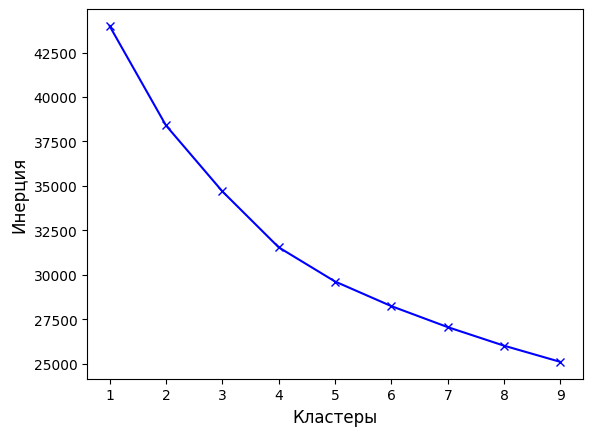

In [ ]:
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X_sc))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

Однако изгиб на графике также может быть представлен нечётко, то могут подойти другие методы, например коэффициент силуэта.

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси X отложено количество кластеров, а по оси y — значение коэффициента силуэта.

Коэффициент силуэта показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: xlabel='cluster', ylabel='silhouette'>

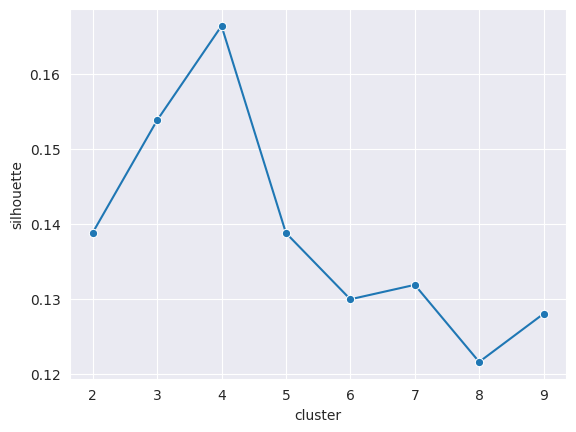

In [ ]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_sc))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [ ]:
# задаём модель K-means с числом кластеров 4
km = KMeans(n_clusters=4, random_state=42)

In [ ]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# сохраняем метки кластера в столбец 'cluster_km' нашего исходного датасета - gym, и датасета с признаками - Х
df['cluster'] = labels
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,3
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,1
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0,1
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497,0,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168,1,1
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146,0,0
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108,0,0


### 3.3  Оценка средних значений и распределений признаков по кластерам

In [ ]:
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster,,,,,,,,,,,,
0,0.489567,0.995987,0.941413,0.771268,1.0,7.784912,0.513644,29.659711,157.172004,4.521669,1.979866,0.105939
1,0.525180,1.000000,0.175982,0.061981,1.0,3.032651,0.394023,28.975650,143.394738,3.335362,1.848500,0.333149
2,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Посмотрим на распределения бинарных признаков в разбивке по кластерам.

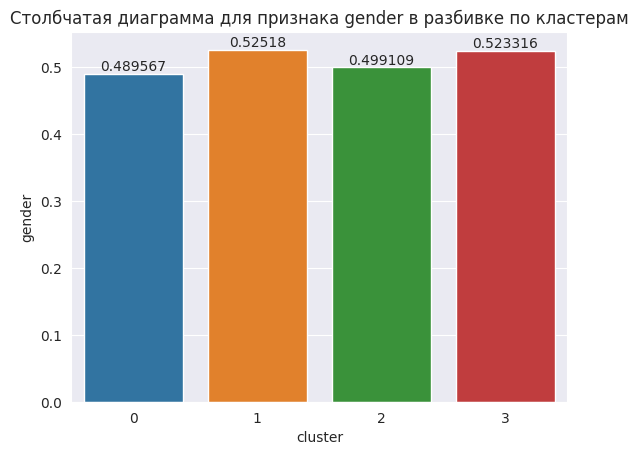

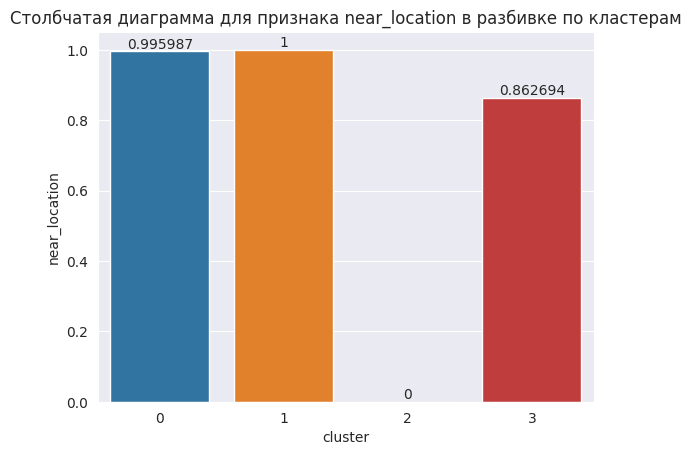

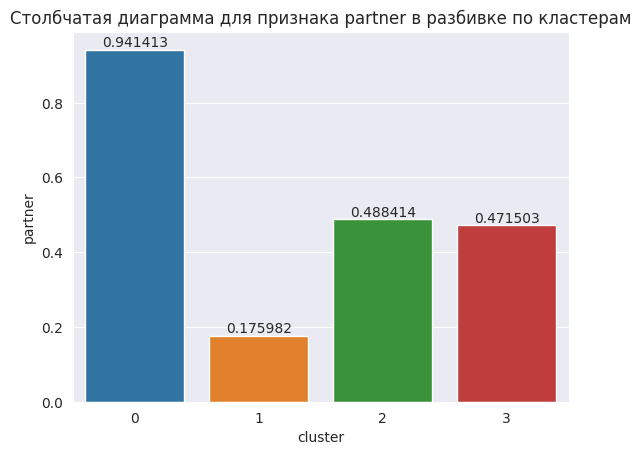

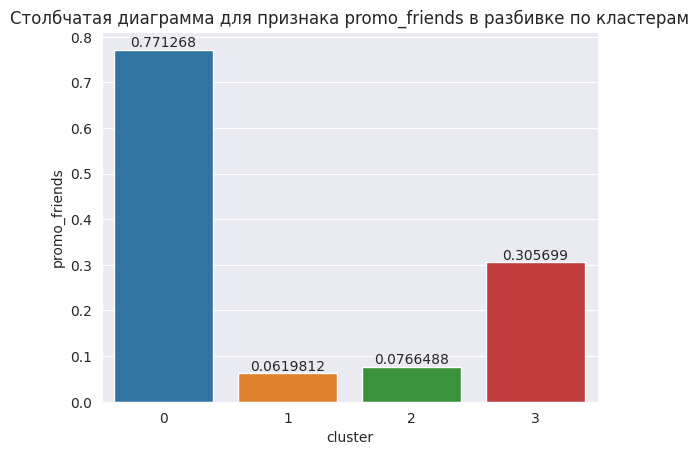

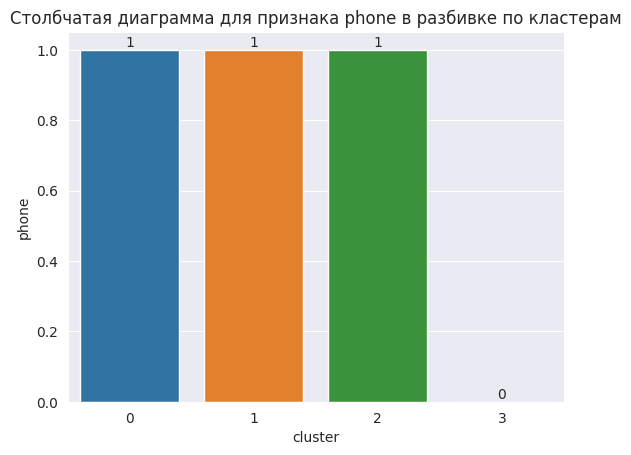

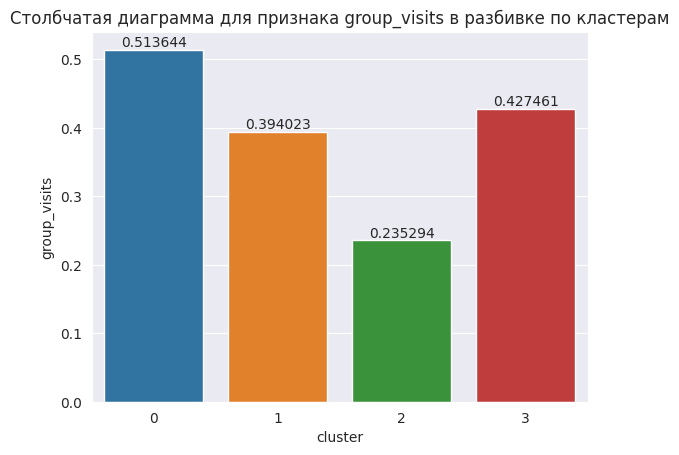

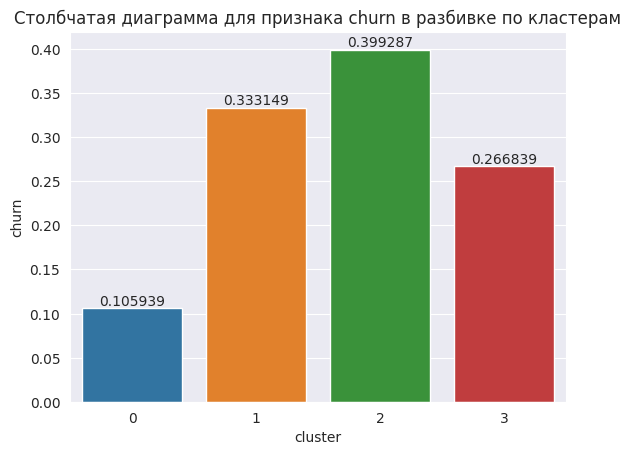

In [ ]:
for col in binary_list + ['churn']:
    plt.title(f'Столбчатая диаграмма для признака {col} в разбивке по кластерам')
    ax = sns.barplot(df,  x='cluster', y=col, errorbar=None)
    ax.bar_label(ax.containers[0])
    plt.show()

Посмотрим на распределения непрерывных признаков в разбивке по кластерам.

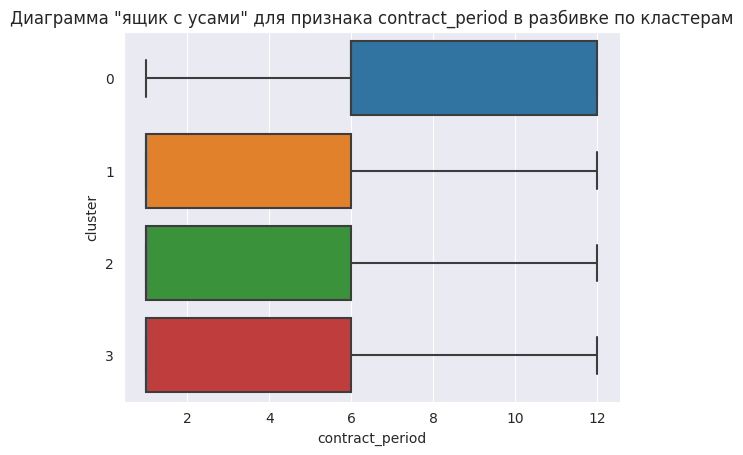

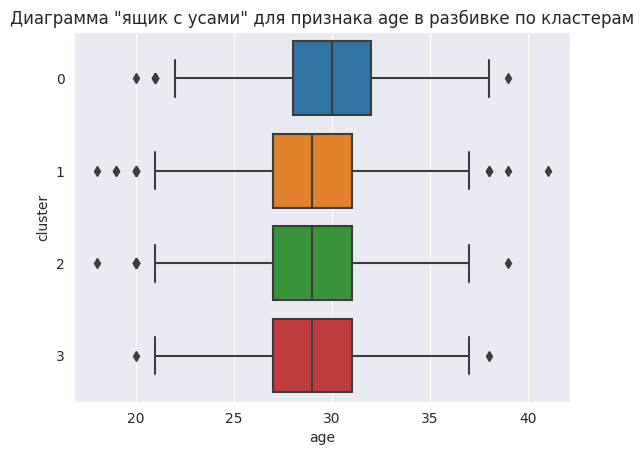

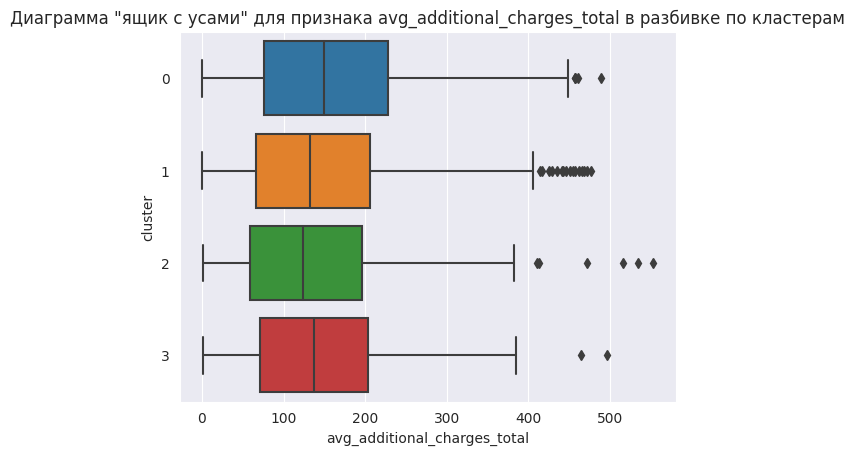

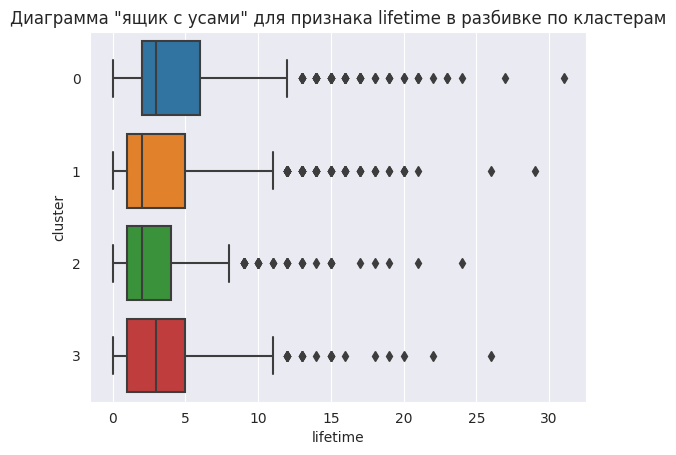

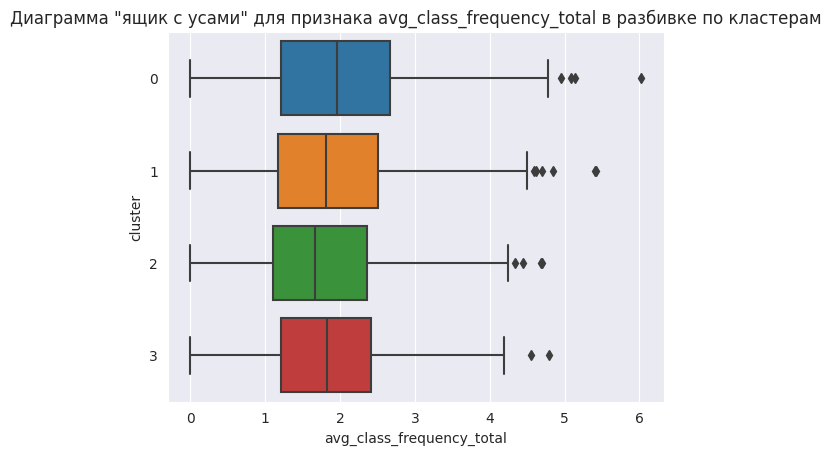

In [ ]:
for col in not_binary_list:
    plt.title(f'Диаграмма "ящик с усами" для признака {col} в разбивке по кластерам')
    ax = sns.boxplot(df, orient = 'h', x = col, y = 'cluster')
    plt.show()